In [18]:
import pandas as pd
import numpy as np
from scipy import stats, cluster
import matplotlib.pyplot as plt

In [6]:
OS_metadata = pd.read_csv('ftir_metadata.csv')
der_spectra = pd.read_csv('open_specy_ftir_library_DERINT.csv')

del der_spectra['wavenos']

def norm_pearson(p,q):
    modp = p/(np.max(p) - np.min(p))
    modq = q/(np.max(q) - np.min(q))
    return stats.pearsonr(modp,modq)[0]

In [79]:
tuples = []
distances = []

for ix in range(1,len(der_spectra.columns)+1):
    for ix2 in range(ix+1,len(der_spectra.columns)+1):
        tuples.append((ix,ix2))
        distances.append(norm_pearson(der_spectra[str(ix)],der_spectra[str(ix2)]))

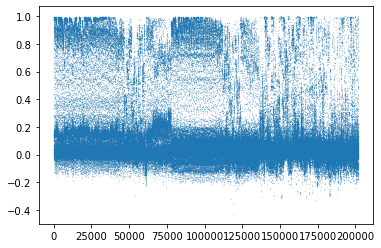

In [80]:
plt.plot(distances,'o',markersize=.1)

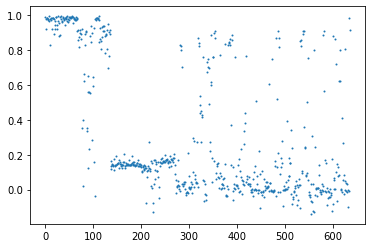

In [81]:
plt.plot(distances[:637],'o',markersize=1)

In [82]:
dist_key = pd.DataFrame()
dist_key['tuples'] = tuples
dist_key['distances'] = distances
dist_key[(dist_key['tuples'].apply({8}.issubset)) & (dist_key['distances']>.8)]['tuples']

6         (1, 8)
640       (2, 8)
1273      (3, 8)
1905      (4, 8)
2536      (5, 8)
          ...   
4998    (8, 583)
4999    (8, 584)
5017    (8, 602)
5022    (8, 607)
5044    (8, 629)
Name: tuples, Length: 143, dtype: object

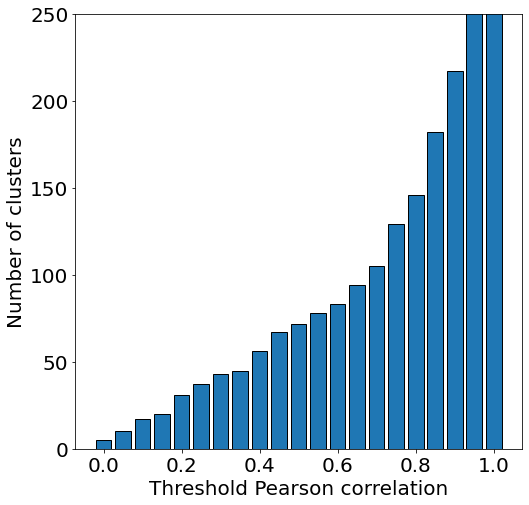

In [168]:
def cluster_tot(threshold):
    clusters = []
    for ix in range(1,637):
        if ix not in [item for sublist in clusters for item in sublist]:
            prox_tups = dist_key[(dist_key['tuples'].apply({ix}.issubset)) & (dist_key['distances']>threshold)]['tuples']
            cluster1 = [item for sublist in prox_tups for item in sublist if item != ix]
            cluster1.insert(0,ix)
            clusters.append(cluster1)
    return clusters

#len(cluster_tot(0.8))
#prox_tups
thres = np.arange(0,1.05,.05)
fig, axs = plt.subplots(figsize=(8,8))
axs.bar(thres,[len(cluster_tot(k)) for k in thres], width=.04, edgecolor = 'k')
axs.set_xlabel('Threshold Pearson correlation', fontsize=20)
axs.set_ylabel('Number of clusters', fontsize=20)
axs.set_ylim([0,250])
axs.tick_params(axis='both', labelsize=20)
plt.savefig('clusters_v_thres.png',bbox_inches='tight')
plt.show()

In [207]:
clusters = cluster_tot(.3)
cluster_key = []
for sn in OS_metadata['sample_name']:
    cluster_key.append(next((i for i,v in enumerate(clusters) if (sn in v)), [99]))
#    for ix in range(len(clusters)):
#        if sn in clusters[ix]:
#            cluster_key.append(ix)

OS_metadata['cluster_key'] = cluster_key
OS_metadata.to_csv('ftir_metadata_clusters.csv')
#cluster_key

In [144]:
[(OS_metadata[OS_metadata['sample_name']==k[0]]['spectrum_identity'].tolist()[0], len(k)) for k in cluster_tot(.3)]

[('HDPE', 206),
 ('HDPE', 26),
 ('HDPE', 22),
 ('HDPE', 36),
 ('PET', 167),
 ('1 2 polybutadiene', 1),
 ('acrylonitrile butadiene styrene', 13),
 ('fibre acetate', 31),
 ('acrylonitrile butadiene', 4),
 ('algae fucus serratus', 106),
 ('amber', 13),
 ('polyhydroxybutyric acid', 19),
 ('chitin cancer pagurus', 7),
 ('polystyrene expanded', 20),
 ('silicone rubber', 7),
 ('ethyl cellulose', 38),
 ('ethylene vinyl alcohol', 13),
 ('copolyamide', 47),
 ('polyvinylchloride', 19),
 ('polypropylene', 16),
 ('silica gel lab', 3),
 ('aramid', 2),
 ('polycarbonate', 9),
 ('polyesterurethane', 28),
 ('phenoxy resin', 7),
 ('polylactic acid', 3),
 ('poly(2 4 6 tribromostyrene)', 1),
 ('poly(2 6 dimethyl p phenylene oxide)', 1),
 ('poly(4 methyl 1 pentene)', 10),
 ('poly(diallyl isophthalate)', 14),
 ('poly(ethylene glycol)', 2),
 ('poly(phenylene sulfide)', 1),
 ('poly(p phenylene ether sulphone)', 3),
 ('poly(vinyl butyral)', 1),
 ('polyacetal', 3),
 ('polyacrylamide carboxyl modified', 2),
 ('po

In [208]:
len(cluster_tot(.3))

43

In [187]:
clusters = cluster_tot(.5)
bool(set(clusters[0]) & set(clusters[1]))

True

In [199]:
next((i for i,v in enumerate([3,4,5,6]) if v>9), ['h'])

['h']